In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Create synthetic dataset
np.random.seed(42)

n = 100
rainfall = np.random.uniform(50, 300, n)
area = np.random.uniform(20, 200, n)
efficiency = np.random.uniform(0.6, 0.9, n)


water_harvested = rainfall * area * efficiency / 1000


df = pd.DataFrame({
    'Rainfall (mm)': rainfall,
    'Rooftop Area (m²)': area,
    'Efficiency': efficiency,
    'Water Harvested (liters)': water_harvested
})

df.head()


,Rainfall (mm),Rooftop Area (m²),Efficiency,Water Harvested (liters)
0,143.635030,25.657253,0.792609,2.920988
1,287.678577,134.553874,0.625242,24.202034
2,232.998485,76.584077,0.648489,11.571614
3,199.664621,111.542724,0.869566,19.366228
4,89.004660,183.361965,0.781929,12.761131


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rainfall (mm)             100 non-null    float64
 1   Rooftop Area (m²)         100 non-null    float64
 2   Efficiency                100 non-null    float64
 3   Water Harvested (liters)  100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


,0
Rainfall (mm),0
Rooftop Area (m²),0
Efficiency,0
Water Harvested (liters),0


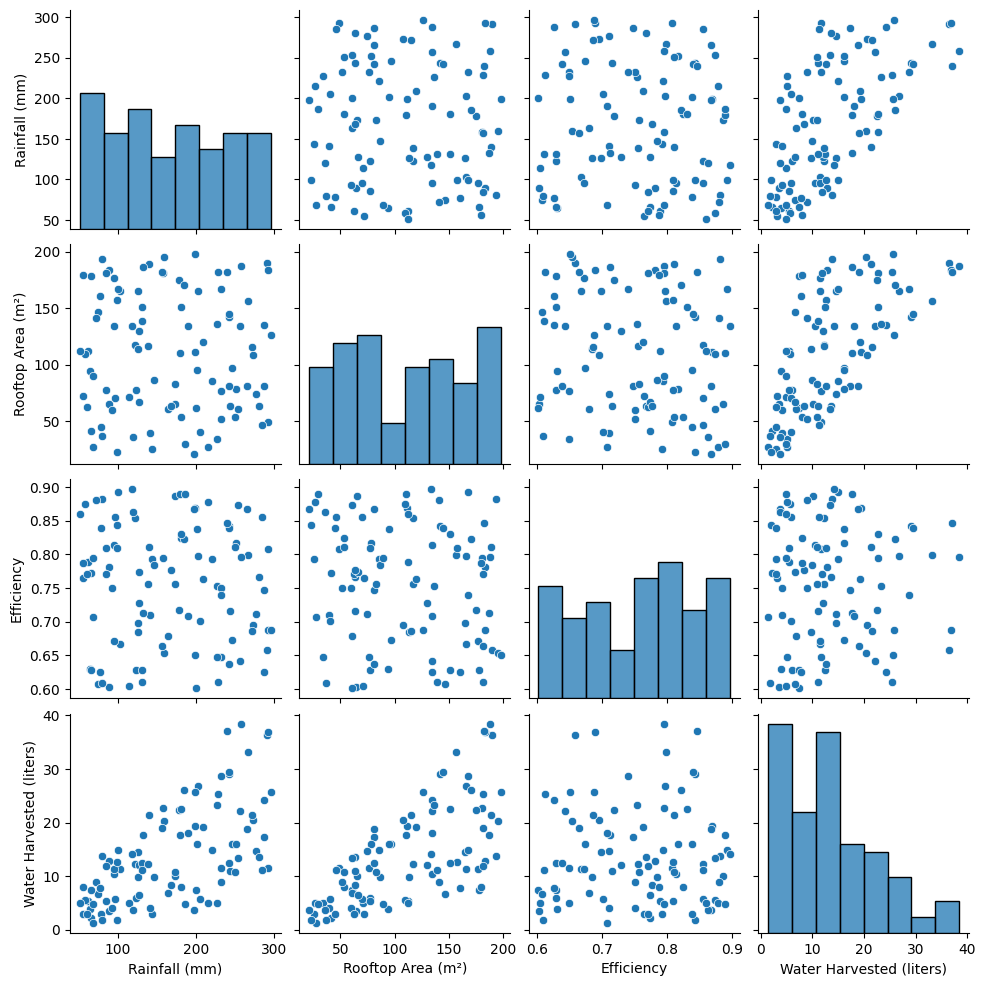

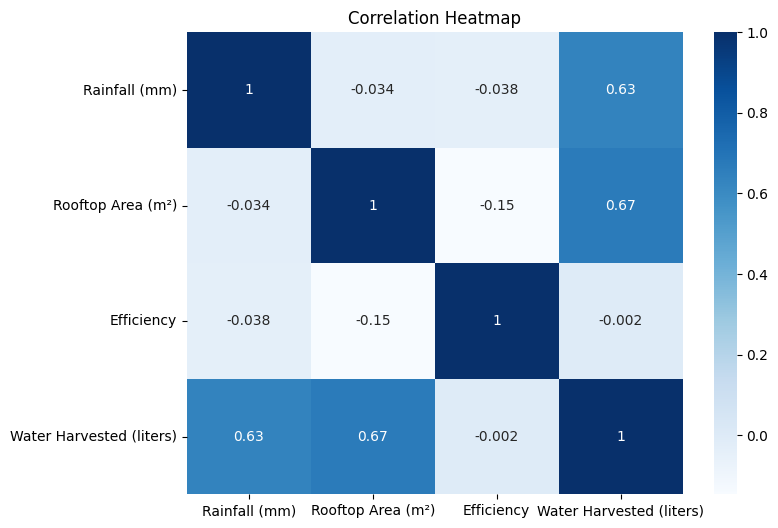

In [4]:
sns.pairplot(df)
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


In [5]:
# Features (X) and Target (y)
X = df[['Rainfall (mm)', 'Rooftop Area (m²)', 'Efficiency']]
y = df['Water Harvested (liters)']


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability (optional)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,Rainfall (mm),Rooftop Area (m²),Efficiency
0,0.376025,0.025010,0.646675
1,0.963140,0.643159,0.080283
2,0.740267,0.314095,0.158953
3,0.604399,0.512536,0.907106
4,0.153354,0.920216,0.610530


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [10]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(3,)),                   # 👈 This replaces input_shape in Dense
    Dense(16, activation='relu'),       # Hidden layer 1
    Dense(8, activation='relu'),        # Hidden layer 2
    Dense(1)                             # Output layer (no activation for regression)
])


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 43.6656 - mae: 5.1781 - val_loss: 94.3538 - val_mae: 7.9938
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 48.8180 - mae: 5.5083 - val_loss: 93.8714 - val_mae: 7.9740
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 40.6491 - mae: 4.9127 - val_loss: 93.5633 - val_mae: 7.9573
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 43.8785 - mae: 5.2171 - val_loss: 93.1358 - val_mae: 7.9391
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 39.1257 - mae: 4.8692 - val_loss: 92.8772 - val_mae: 7.9227
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 43.5513 - mae: 5.0779 - val_loss: 92.7420 - val_mae: 7.9075
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 37.6825 - mae: 4.7504 - val_loss: 92.5481 - val_mae: 7.8913
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 38.2023 - mae: 4.8387 - val_loss: 92.3257 - val_mae: 7.8739
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 38.6713

In [14]:
# Evaluate model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 58.5498 - mae: 6.1195
Test Loss (MSE): [58.549781799316406, 6.119482517242432]


In [15]:
# Make predictions
y_pred = model.predict(X_test)

# Print actual vs predicted
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual:.2f} — Predicted: {predicted[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Actual: 7.36 — Predicted: 10.25
Actual: 20.57 — Predicted: 15.86
Actual: 29.08 — Predicted: 17.48
Actual: 5.05 — Predicted: 14.69
Actual: 4.94 — Predicted: 9.23
Actual: 20.37 — Predicted: 13.71
Actual: 5.97 — Predicted: 9.89
Actual: 18.75 — Predicted: 17.19
Actual: 3.04 — Predicted: 9.44
Actual: 2.92 — Predicted: 11.46


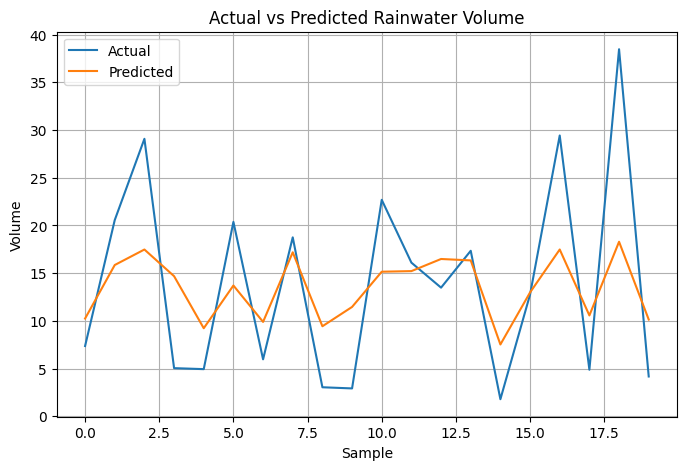

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Rainwater Volume")
plt.xlabel("Sample")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Save the model to a file
model.save("rainwater_harvesting_ann_model.h5")


In [19]:
loaded_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [20]:
import joblib

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# To load it back
# scaler = joblib.load("scaler.pkl")


['scaler.pkl']